# Отток клиентов из банка

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подключим-необходимые-библиотеки" data-toc-modified-id="Подключим-необходимые-библиотеки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключим необходимые библиотеки</a></span></li><li><span><a href="#Откроем-таблицу,-посмотрем-внешний-вид-и-изучим-общую-информацию-о-данных." data-toc-modified-id="Откроем-таблицу,-посмотрем-внешний-вид-и-изучим-общую-информацию-о-данных.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Откроем таблицу, посмотрем внешний вид и изучим общую информацию о данных.</a></span></li><li><span><a href="#Удалим-столбцы-не-являющимися-признаками-для-обучения-для-модели." data-toc-modified-id="Удалим-столбцы-не-являющимися-признаками-для-обучения-для-модели.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Удалим столбцы не являющимися признаками для обучения для модели.</a></span></li><li><span><a href="#Проверим-датафрейм-на-дубликаты" data-toc-modified-id="Проверим-датафрейм-на-дубликаты-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверим датафрейм на дубликаты</a></span></li><li><span><a href="#Посмотрим-на-состав-столбцов" data-toc-modified-id="Посмотрим-на-состав-столбцов-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Посмотрим на состав столбцов</a></span></li><li><span><a href="#Вывод:-Нельзя-сказать,-что-пропуски-могут-быть-связаны-и-с-другими-столбцами,-поэтому-необходимо-рассмотреть-все-варианты-действий-с-пропусками-и-сравнить-их." data-toc-modified-id="Вывод:-Нельзя-сказать,-что-пропуски-могут-быть-связаны-и-с-другими-столбцами,-поэтому-необходимо-рассмотреть-все-варианты-действий-с-пропусками-и-сравнить-их.-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span><strong>Вывод:</strong> Нельзя сказать, что пропуски могут быть связаны и с другими столбцами, поэтому необходимо рассмотреть все варианты действий с пропусками и сравнить их.</a></span></li><li><span><a href="#Рассмотрим-следующие-варианты:" data-toc-modified-id="Рассмотрим-следующие-варианты:-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Рассмотрим следующие варианты:</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span><strong>Вывод:</strong></a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-разделения-данных-c-отображением-дисбаланса-меток-1-и-0" data-toc-modified-id="Напишем-функцию-разделения-данных-c-отображением-дисбаланса-меток-1-и-0-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Напишем функцию разделения данных c отображением дисбаланса меток 1 и 0</a></span></li><li><span><a href="#Создаем-три-выборки-из-датафрейма-df_without_nan-(пропуски-удалены)" data-toc-modified-id="Создаем-три-выборки-из-датафрейма-df_without_nan-(пропуски-удалены)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Создаем три выборки из датафрейма df_without_nan (пропуски удалены)</a></span></li><li><span><a href="#Создаем-три-выборки-из-датафрейма-df_with_zero-(пропуски-заменены-на-0)" data-toc-modified-id="Создаем-три-выборки-из-датафрейма-df_with_zero-(пропуски-заменены-на-0)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Создаем три выборки из датафрейма df_with_zero (пропуски заменены на 0)</a></span></li><li><span><a href="#Создаем-три-выборки-из-датафрейма-df_with_median-(пропуски-заменены-на-медиану)" data-toc-modified-id="Создаем-три-выборки-из-датафрейма-df_with_median-(пропуски-заменены-на-медиану)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Создаем три выборки из датафрейма df_with_median (пропуски заменены на медиану)</a></span></li><li><span><a href="#Обучим-разные-модели-без-учета-дисбаланса-классов" data-toc-modified-id="Обучим-разные-модели-без-учета-дисбаланса-классов-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Обучим разные модели без учета дисбаланса классов</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-построеня-ROC-криваой-и-нахождения-метрики-качества-AUC-ROC-и-представления-F1-меры." data-toc-modified-id="Напишем-функцию-построеня-ROC-криваой-и-нахождения-метрики-качества-AUC-ROC-и-представления-F1-меры.-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Напишем функцию построеня ROC-криваой и нахождения метрики качества AUC-ROC и представления F1 меры.</a></span></li><li><span><a href="#Напишем-функцию,-которая-перебором,-меняя-параметры-и-гиперпараметры-ищет-лучшую-модель-по-максимальной-F1-мере." data-toc-modified-id="Напишем-функцию,-которая-перебором,-меняя-параметры-и-гиперпараметры-ищет-лучшую-модель-по-максимальной-F1-мере.-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Напишем функцию, которая перебором, меняя параметры и гиперпараметры ищет лучшую модель по максимальной F1-мере.</a></span></li><li><span><a href="#Найдем-лучшие-модели-без-учета-дисбаланса.-Обучать-будем-три-модели-DecisionTreeClassifier,-RandomForestClassifier,-LogisticRegression-на-трех-выборках-подготовненных-из-df_without_nan,-df_with_zero,-df_with_median" data-toc-modified-id="Найдем-лучшие-модели-без-учета-дисбаланса.-Обучать-будем-три-модели-DecisionTreeClassifier,-RandomForestClassifier,-LogisticRegression-на-трех-выборках-подготовненных-из-df_without_nan,-df_with_zero,-df_with_median-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Найдем лучшие модели без учета дисбаланса. Обучать будем три модели DecisionTreeClassifier, RandomForestClassifier, LogisticRegression на трех выборках подготовненных из df_without_nan, df_with_zero, df_with_median</a></span></li><li><span><a href="#Нашли-лучшие-модели-без-учета-дисбаланса.--Построим-ROC-кривую-и-найдем-метрику-качества-AUC-ROC-для-каждой-модели-и-для-каждого-датафрейма" data-toc-modified-id="Нашли-лучшие-модели-без-учета-дисбаланса.--Построим-ROC-кривую-и-найдем-метрику-качества-AUC-ROC-для-каждой-модели-и-для-каждого-датафрейма-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Нашли лучшие модели без учета дисбаланса.  Построим ROC-кривую и найдем метрику качества AUC-ROC для каждой модели и для каждого датафрейма</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Для-борьбы-с-дисбалансом-воспользуемся-техниками-увеличение-выборки-(upsampling),-уменьшение-выборки(downsampling)-и-изменением-class_weight" data-toc-modified-id="Для-борьбы-с-дисбалансом-воспользуемся-техниками-увеличение-выборки-(upsampling),-уменьшение-выборки(downsampling)-и-изменением-class_weight-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Для борьбы с дисбалансом воспользуемся техниками увеличение выборки (upsampling), уменьшение выборки(downsampling) и изменением class_weight</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию,-который-перебором,-меняя-параметры-и-гиперпараметры-а-также-меняя-колличество-раз-увеличения-(уменьшения)--положительных-объектов--и-изменением-class_weight-ищет-лучшую-модель-по-максимальной-F1-мере" data-toc-modified-id="Напишем-функцию,-который-перебором,-меняя-параметры-и-гиперпараметры-а-также-меняя-колличество-раз-увеличения-(уменьшения)--положительных-объектов--и-изменением-class_weight-ищет-лучшую-модель-по-максимальной-F1-мере-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Напишем функцию, который перебором, меняя параметры и гиперпараметры а также меняя колличество раз увеличения (уменьшения)  положительных объектов  и изменением class_weight ищет лучшую модель по максимальной F1-мере</a></span></li><li><span><a href="#Найдем-лучшие-модели-с-учетом-дисбаланса." data-toc-modified-id="Найдем-лучшие-модели-с-учетом-дисбаланса.-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Найдем лучшие модели с учетом дисбаланса.</a></span></li><li><span><a href="#Нашли-лучшие-модели-с-учетом-дисбаланса.--Построим-ROC-кривую-и-найдем-метрику-качества-AUC-ROC-для-каждой-модели-и-для-каждого-датафрейма" data-toc-modified-id="Нашли-лучшие-модели-с-учетом-дисбаланса.--Построим-ROC-кривую-и-найдем-метрику-качества-AUC-ROC-для-каждой-модели-и-для-каждого-датафрейма-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Нашли лучшие модели с учетом дисбаланса.  Построим ROC-кривую и найдем метрику качества AUC-ROC для каждой модели и для каждого датафрейма</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><strong>Общий вывод</strong></a></span></li></ul></li></ul></div>

# Описание данных

**Признаки**
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

**Целевой признак**
* Exited — факт ухода клиента

## Загрузка и подготовка данных

### Подключим необходимые библиотеки

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

from random import randint
import random
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import DataConversionWarning

from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score


### Откроем таблицу, посмотрем внешний вид и изучим общую информацию о данных.

In [7]:
try:
    df = pd.read_csv('C:\\Users\\Имя\\Desktop\\Churn.csv')
except FileNotFoundError:
    df = pd.read_csv('/datasets/Churn.csv')


display(df.head(10))
display(df.tail(10))
df.info()
print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3.0,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4.0,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.0,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7.0,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
(10000, 14)


### Удалим столбцы не являющимися признаками для обучения для модели.

* RowNumber( индекс строки в данных просто дублирует название строки + 1)
* CustomerId (уникальный идентификатор клиента)
* Surname (фамилия)

Остальные будут являтся признаками для обучения для модели.

In [8]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis = 1)
display(df.head(10))

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Приведем к нижнему регистру названия столбцов

In [9]:
df.columns = df.columns.str.lower()
print(df.columns)
print()
df.info()
display(df.head(10))

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           9091 non-null   float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


### Проверим датафрейм на дубликаты

In [10]:
print(df.duplicated().sum())

0


Явных дубликатов нет.

### Посмотрим на состав столбцов

In [11]:
for col in ['creditscore', 'geography', 'gender', 'age', 'tenure',
       'numofproducts', 'hascrcard', 'isactivemember',
       'exited']:
    print('Столбец', col )
    print(df[col].sort_values(ascending=False).unique())
    print(df[col].value_counts())
    print()
    print()

Столбец creditscore
[850 849 848 847 846 845 844 843 842 841 840 839 838 837 836 835 834 833
 832 831 830 829 828 827 826 825 824 823 822 821 820 819 818 817 816 815
 814 813 812 811 810 809 808 807 806 805 804 803 802 801 800 799 798 797
 796 795 794 793 792 791 790 789 788 787 786 785 784 783 782 781 780 779
 778 777 776 775 774 773 772 771 770 769 768 767 766 765 764 763 762 761
 760 759 758 757 756 755 754 753 752 751 750 749 748 747 746 745 744 743
 742 741 740 739 738 737 736 735 734 733 732 731 730 729 728 727 726 725
 724 723 722 721 720 719 718 717 716 715 714 713 712 711 710 709 708 707
 706 705 704 703 702 701 700 699 698 697 696 695 694 693 692 691 690 689
 688 687 686 685 684 683 682 681 680 679 678 677 676 675 674 673 672 671
 670 669 668 667 666 665 664 663 662 661 660 659 658 657 656 655 654 653
 652 651 650 649 648 647 646 645 644 643 642 641 640 639 638 637 636 635
 634 633 632 631 630 629 628 627 626 625 624 623 622 621 620 619 618 617
 616 615 614 613 612 611 610 60

В столбце creditscore с рейтингом 850 аж 233 клиента, но видимо это просто "потолок" рейтинга.

Данные выглядят нормально, за исключением пропусков в столбце tenure (сколько лет человек является клиентом банка). Посмотрим на столбец поближе.

In [12]:
print('Количество NaN:', df['tenure'].isnull().sum())
print('Это', round((df['tenure'].isnull().sum() / df['tenure'].count()) * 100, 1), '% из всего датафрейма')

Количество NaN: 909
Это 10.0 % из всего датафрейма


Отдельно посмотрим на этих клиентов

In [13]:
df_with_nan = df[df['tenure'].isna()]
display(df_with_nan)                    
for col in ['creditscore', 'geography', 'gender', 'age', 'tenure',
       'numofproducts', 'hascrcard', 'isactivemember',
       'exited']:
    print('Столбец', col )
    print(df_with_nan[col].sort_values(ascending=False).unique())
    print(df_with_nan[col].value_counts())
    print()
    print()
   

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...
9944,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Столбец creditscore
[850 846 844 841 840 838 836 835 834 833 832 829 828 827 826 825 824 823
 821 820 815 812 811 810 809 808 807 806 805 804 801 800 798 797 796 795
 794 793 792 791 790 786 785 783 781 780 779 778 777 775 774 770 769 768
 767 765 764 763 762 761 760 759 757 756 755 754 753 752 749 748 746 745
 744 743 742 741 740 739 738 736 735 734 733 732 731 730 729 728 727 726
 725 724 723 722 721 720 719 718 717 716 715 714 713 712 711 710 709 708
 707 706 705 704 703 702 701 699 698 697 696 695 694 693 692 691 690 689
 688 687 685 684 683 682 681 680 679 678 677 676 675 674 673 672 671 670
 669 668 667 665 664 663 662 661 660 659 658 657 656 655 654 653 652 651
 650 649 648 647 646 645 644 643 642 641 640 639 638 637 636 635 634 633
 632 631 630 629 628 627 626 625 624 622 621 620 619 618 616 615 614 613
 612 611 610 609 608 607 606 605 604 603 602 601 600 599 598 597 596 595
 594 593 592 591 590 589 588 587 586 585 584 583 582 581 580 579 578 577
 576 575 574 573 572 571 570 56

Интерес вызывает различие значений возраста датафрейма только из NaN и только без NaN, сравним их.

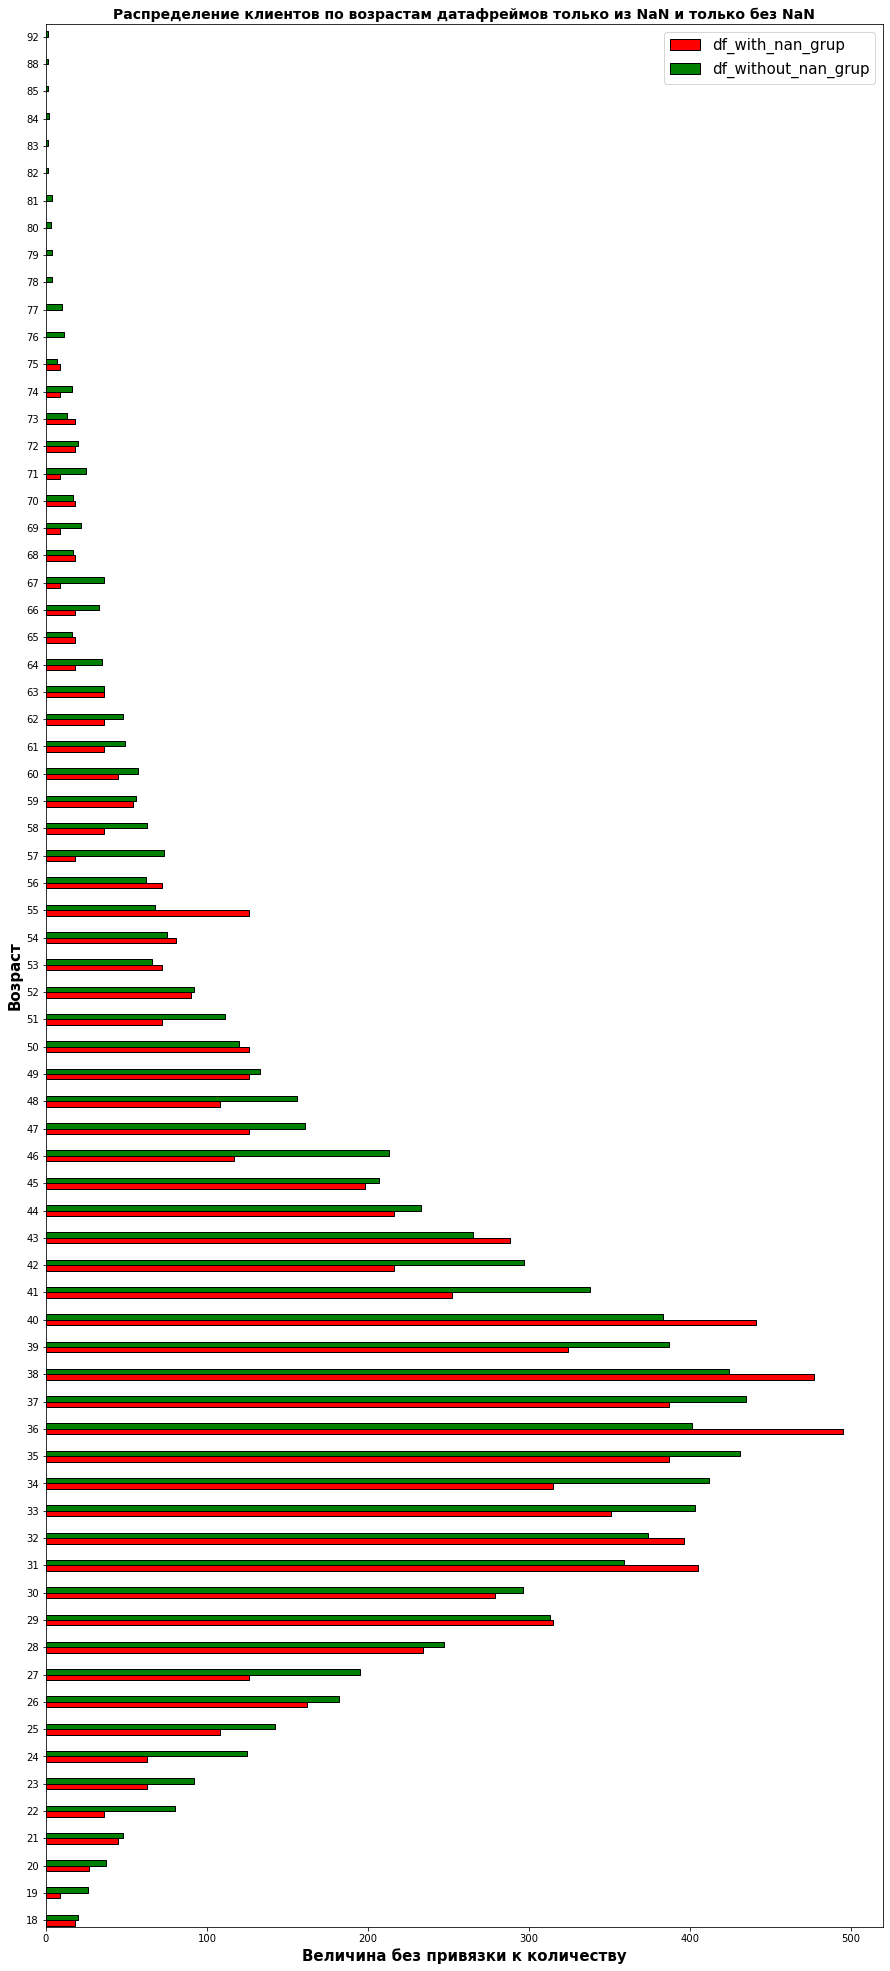

In [14]:
df_without_nan = df[df['tenure'].notna()]
ax = plt.gca()
df_without_nan_grup = df_without_nan.groupby('age') \
                        .agg({'creditscore': 'count'}) \
                        .sort_values(by='age', ascending=True) 


df_with_nan_grup = df_with_nan.groupby('age') \
                        .agg({'creditscore': 'count'}) \
                        .sort_values(by='age', ascending=True) 
                        
df_with_nan_grup ['creditscore'] = df_with_nan_grup ['creditscore'] * 9
        

df_with_nan_grup ['creditscore'].plot(kind='barh', figsize=(15,35), ec='black', ax=ax, width=0.2, color='r', position=1)
df_without_nan_grup ['creditscore'].plot(kind='barh', figsize=(15,35), ec='black', ax=ax, width=0.2, color='g', position=0)
                
plt.title('Распределение клиентов по возрастам датафреймов только из NaN и только без NaN', fontsize=14, fontweight="bold")
plt.xlabel("Величина без привязки к количеству", fontsize=15, fontweight="bold")
plt.ylabel("Возраст", fontsize=15, fontweight="bold")                
ax.legend(['df_with_nan_grup', 'df_without_nan_grup'], fontsize=15)


Связи пропусков с возрастом не нашлось.

### **Вывод:** Нельзя сказать, что пропуски могут быть связаны и с другими столбцами, поэтому необходимо рассмотреть все варианты действий с пропусками и сравнить их.

### Рассмотрим следующие варианты:
* Удалим строки с пропусками (уже есть df_without_nan)
* Заменим пропуски на:
 * ноль (клиент может только стал клиентм банка, может поменял банк)
 * среднее
 * медиану

 
Для этого создадим еще три датафрейма.

In [15]:
print(df['tenure'].mean())
print(df['tenure'].median())

4.997690023099769
5.0


Среднее и медиана одинаковые, тогда остановимся на медиане и нуле.

In [16]:
df_with_zero = df.fillna(0)
display(df_with_zero.head(10))
print(df_with_zero['tenure'].sort_values(ascending=False).unique())
df_with_zero.info()
print()
print()
df_with_median = df.fillna(df['tenure'].median())
display(df_with_median.head(10))
print(df_with_median['tenure'].sort_values(ascending=False).unique())
df_with_median.info()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB




,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


### **Вывод:** 
* Изучили данные
* Удалили лишние столбцы, которые либо дублируют индексы, либо не являются признаками.
* Проверили на дубликаты
* Подготовили для исследования три датафрейма:
 * в первом удалили строки с NaN
 * во втором NaN заменили на ноль
 * в третьем NaN заменили на медианное значение

Итого, у нас для рассмотрения три датафрейма df_without_nan, df_with_zero, df_with_median.

## Исследование задачи

### Напишем функцию разделения данных c отображением дисбаланса меток 1 и 0

Напишем функцию разделения данных на признаки и целевой признак, где целевой признак это 'exited' и одновременно деления данных на разобьём на три выборки: обучающую, валидационного и тестовую. 

Размеры тестового и валидационного наборов обычно равны. 

Исходные данные разбиваем в соотношении 3:1:1. Спроецируем методом stratify изначальный дисбаланс меток 1 и 0 в таргете на target_test и target_valid. 

Также преобразуем категориальные признаки в численные техникой порядкового кодирования (Ordinal Encoding), для того чтоб не возникало ошибок при работе методов обучения связанных с попытками преобразовать все элементы string в вещественное число.

In [17]:
def splitting(data):
    data_ordinal = pd.DataFrame(oe.fit_transform(data), columns = data.columns)
    target = data_ordinal['exited']
    features = data_ordinal.drop('exited', axis=1)
    
    print('Размер target', target.shape[0])
    print('Размер features', features.shape[0])
    print('Соотношение меток 1 и 0 в таргете:', target[target == 0].count() / target[target == 1].count()) 
    
    features_train, features_df, target_train, target_df = train_test_split(features, target
                                                                              , test_size=0.40
                                                                              , random_state=12345
                                                                              , stratify=target)
    features_test, features_valid, target_test, target_valid = train_test_split(features_df, target_df
                                                                              , test_size=0.50
                                                                              , random_state=12345
                                                                              , stratify=target_df)
    
    print('Размер обучающей выборки', features_train.shape[0])
    print('Размер валидационной выборки', features_valid.shape[0])
    print('Размер тестовой выборки', features_test.shape[0])
    print('Соотношение меток 1 и 0 в target_valid:'
      , target_valid[target_valid == 0].count() / target_valid[target_valid == 1].count())
    print('Соотношение меток 1 и 0 в target_test:'
      , target_test[target_test == 0].count() / target_test[target_test == 1].count())
    print('Количество 0 в таргете:', target_test[target_test == 0].count())
    print('Количество 1 в таргете:', target_test[target_test == 1].count())
    
    
    return (features_train, features_test, features_valid, target_train, target_test, target_valid)


### Создаем три выборки из датафрейма df_without_nan (пропуски удалены)

In [18]:
(features_train_df_without_nan, features_test_df_without_nan, features_valid_df_without_nan
 , target_train_df_without_nan, target_test_df_without_nan, target_valid_df_without_nan) = splitting(df_without_nan)

Размер target 9091
Размер features 9091
Соотношение меток 1 и 0 в таргете: 3.9034519956850056
Размер обучающей выборки 5454
Размер валидационной выборки 1819
Размер тестовой выборки 1818
Соотношение меток 1 и 0 в target_valid: 3.9029649595687332
Соотношение меток 1 и 0 в target_test: 3.9002695417789757
Количество 0 в таргете: 1447
Количество 1 в таргете: 371


### Создаем три выборки из датафрейма df_with_zero (пропуски заменены на 0)

In [19]:
(features_train_df_with_zero, features_test_df_with_zero, features_valid_df_with_zero
 , target_train_df_with_zero, target_test_df_with_zero, target_valid_df_with_zero) = splitting(df_with_zero)

Размер target 10000
Размер features 10000
Соотношение меток 1 и 0 в таргете: 3.9091801669121256
Размер обучающей выборки 6000
Размер валидационной выборки 2000
Размер тестовой выборки 2000
Соотношение меток 1 и 0 в target_valid: 3.914004914004914
Соотношение меток 1 и 0 в target_test: 3.9019607843137254
Количество 0 в таргете: 1592
Количество 1 в таргете: 408


### Создаем три выборки из датафрейма df_with_median (пропуски заменены на медиану)

In [20]:
(features_train_df_with_median, features_test_df_with_median, features_valid_df_with_median
 , target_train_df_with_median, target_test_df_with_median, target_valid_df_with_median) = splitting(df_with_median)

Размер target 10000
Размер features 10000
Соотношение меток 1 и 0 в таргете: 3.9091801669121256
Размер обучающей выборки 6000
Размер валидационной выборки 2000
Размер тестовой выборки 2000
Соотношение меток 1 и 0 в target_valid: 3.914004914004914
Соотношение меток 1 и 0 в target_test: 3.9019607843137254
Количество 0 в таргете: 1592
Количество 1 в таргете: 408


### Обучим разные модели без учета дисбаланса классов

#### Напишем функцию построеня ROC-криваой и нахождения метрики качества AUC-ROC и представления F1 меры.

In [21]:
def auc_roc_fun(features_valid, target_valid, model_tree, model_forest, model_log):
    auc_roc_tree = 0
    accuracy_tree = 0
    f1_score_tree = 0
    auc_roc_forest = 0
    accuracy_forest = 0
    f1_score_forest = 0 
    auc_roc_log = 0
    accuracy_log = 0
    f1_score_log = 0
    i = 0
    list = ['0', 'для дерева решений', 'для случайного леса', 'для логистической регрессии']
    for model in [model_tree, model_forest, model_log]:
        i = i + 1
        
        predictions = model.predict(features_valid) 
        accuracy = accuracy_score(target_valid, predictions)
        result = f1_score(target_valid, predictions)
        
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]

        fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
        text = 'ROC-кривая ' + (list[i])

        plt.figure()

        plt.plot([0, 1], [0, 1], linestyle='--')


        plt.plot(fpr, tpr)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(text)
        plt.show()
        
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        if i == 1:
            auc_roc_tree = auc_roc
            f1_score_tree = result
            accuracy_tree = accuracy
        elif i == 2:  
            auc_roc_forest = auc_roc
            f1_score_forest = result
            accuracy_forest = accuracy            
            
        elif i == 3:  
            auc_roc_log = auc_roc
            f1_score_log = result
            accuracy_log = accuracy            
            
    return (auc_roc_tree, auc_roc_forest, auc_roc_log
            , f1_score_tree, f1_score_forest, f1_score_log
            , accuracy_tree, accuracy_forest, accuracy_log) 

#### Напишем функцию, которая перебором, меняя параметры и гиперпараметры ищет лучшую модель по максимальной F1-мере.

In [22]:
def search_best_parameters(features_train, target_train, features_valid, target_valid, class_weight=None):    
  
    best_model_tree = None
    best_result = 0
    for depth in range(4,8):
        for crit in ["gini", "entropy"]:
            for split in ["best", "random"]:
                model = DecisionTreeClassifier(random_state=12345
                                               , max_depth=depth
                                               , criterion=crit
                                               , splitter=split
                                               , class_weight=class_weight)
                model.fit(features_train, target_train)
                predictions = model.predict(features_valid) 
                accuracy = accuracy_score(target_valid, predictions)
                result = f1_score(target_valid, predictions)
            
                
                if result > best_result:
                    best_split=split
                    best_crit=crit
                    max_depth=depth
                    best_model_tree = model
                    best_result = result
                    best_accuracy = accuracy
                    
               
    best_mode_forest = None
    best_result = 0
    best_accuracy = 0
    best_split = 0
    for estim in range(10,27): 
        for crit in ["gini", "entropy"]:
            for boot in [False, True]:
                for warm in [False, True]:
                    for weight in np.arange(0.0, 0.003, 0.001):
                        for max_f in ["auto", "sqrt", "log2"]:
                            model = RandomForestClassifier(random_state=12345
                                                       , n_estimators=estim
                                                       , criterion=crit
                                                       , bootstrap=boot
                                                       , warm_start=warm
                                                       , min_weight_fraction_leaf=weight
                                                       , max_features=max_f
                                                       , class_weight=class_weight)

                            model.fit(features_train, target_train)
                            predictions = model.predict(features_valid) 
                            accuracy = accuracy_score(target_valid, predictions)
                            result = f1_score(target_valid, predictions)
                            
                        

                            if result > best_result:
                                best_max_features=max_f
                                best_min_weight_fraction_leaf=weight
                                best_warm_start=warm
                                best_bootstrap=boot
                                best_criterion=crit
                                best_n_estimators=estim
                                best_model_forest = model
                                best_result = result
                                best_accuracy = accuracy
                        
    
    
    best_model = None
    best_result = 0
    best_max_iter=0
    best_c=0
    for max_iter in range(40,52):
        for number_c in np.arange(0.8, 1.7, 0.1):
            model = LogisticRegression(random_state=12345
                                                   , max_iter=max_iter
                                                   , solver='liblinear'
                                                   , C=number_c
                                                   , class_weight=class_weight)
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid) 
            accuracy = accuracy_score(target_valid, predictions)
            result = f1_score(target_valid, predictions)
            
        

            if result > best_result:
                best_max_iter=max_iter
                best_c=number_c
                best_model_log = model
                best_result = result      
                 
    return (best_model_tree, best_model_forest, best_model_log)


#### Найдем лучшие модели без учета дисбаланса. Обучать будем три модели DecisionTreeClassifier, RandomForestClassifier, LogisticRegression на трех выборках подготовненных из df_without_nan, df_with_zero, df_with_median

In [23]:
(best_model_tree_without_nan
 , best_model_forest_without_nan
 , best_model_log_without_nan) = search_best_parameters(features_train_df_without_nan
                                                                               , target_train_df_without_nan
                                                                               , features_valid_df_without_nan
                                                                               , target_valid_df_without_nan)

print('Лучшие модели, обученные на df_without_nan')
print(best_model_tree_without_nan)
print(best_model_forest_without_nan)
print(best_model_log_without_nan)

(best_model_tree_with_zero
 , best_model_forest_with_zero
 , best_model_log_with_zero) = search_best_parameters(features_train_df_with_zero
                                                                              , target_train_df_with_zero
                                                                              , features_valid_df_with_zero
                                                                              , target_valid_df_with_zero)

print('Лучшие модели, обученные на df_with_zero')
print(best_model_tree_with_zero)
print(best_model_forest_with_zero)
print(best_model_log_with_zero)


(best_model_tree_with_median
 , best_model_forest_with_median
 , best_model_log_with_median) = search_best_parameters(features_train_df_with_median
                                                      , target_train_df_with_median
                                                      , features_valid_df_with_median
                                                      , target_valid_df_with_median)

print('Лучшие модели, обученные на df_with_median')
print(best_model_tree_with_median)
print(best_model_forest_with_median)
print(best_model_log_with_median)


Лучшие модели, обученные на df_without_nan
DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=12345)
RandomForestClassifier(bootstrap=False, min_weight_fraction_leaf=0.001,
                       n_estimators=12, random_state=12345)
LogisticRegression(C=1.2999999999999998, max_iter=40, random_state=12345,
                   solver='liblinear')
Лучшие модели, обученные на df_with_zero
DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=12345)
RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=13,
                       random_state=12345)
LogisticRegression(C=0.8, max_iter=40, random_state=12345, solver='liblinear')
Лучшие модели, обученные на df_with_median
DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=12345)
RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=21,
                       random_state=12345)
LogisticRegression(C=1.4, max_iter=40, random_state=12345, solver='liblinear

#### Нашли лучшие модели без учета дисбаланса.  Построим ROC-кривую и найдем метрику качества AUC-ROC для каждой модели и для каждого датафрейма 

Лучшие модели, обученные на df_without_nan


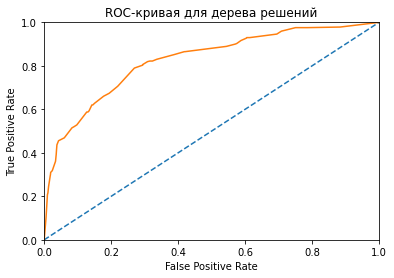

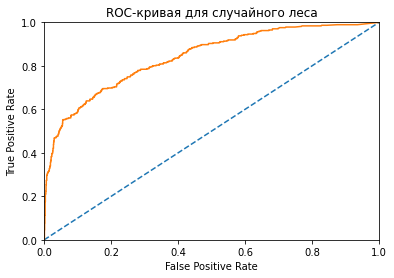

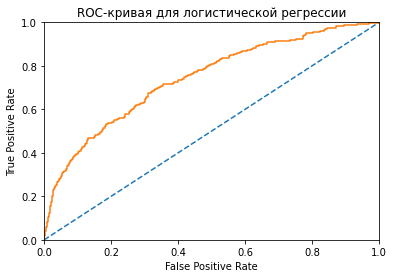

Для дерева решений F1-мера = 0.551 | Mетрика AUC-ROC = 0.825, accuracy = 0.855
Для случайного леса F1-мера = 0.589 | Mетрика AUC-ROC = 0.840, accuracy = 0.868
Для логистической регрессии F1-мера = 0.337 | Mетрика AUC-ROC = 0.742, accuracy = 0.821

________________________________________________________________________________________

Лучшие модели, обученные на df_with_zero


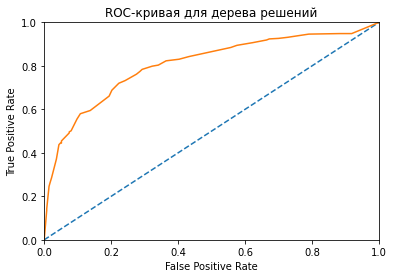

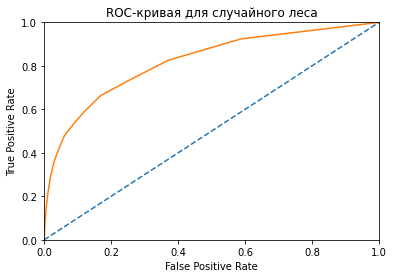

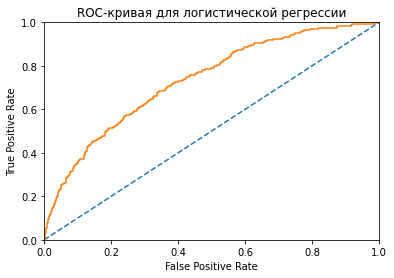

Для дерева решений F1-мера = 0.544 | Mетрика AUC-ROC = 0.806, accuracy = 0.851
Для случайного леса F1-мера = 0.559 | Mетрика AUC-ROC = 0.819, accuracy = 0.846
Для логистической регрессии F1-мера = 0.233 | Mетрика AUC-ROC = 0.734, accuracy = 0.806

________________________________________________________________________________________

Лучшие модели, обученные на df_with_median


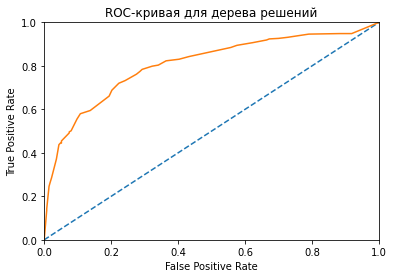

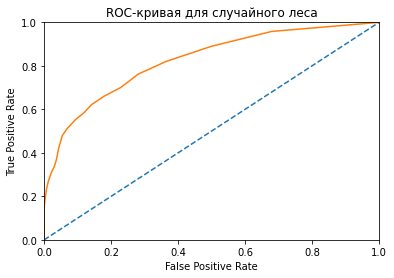

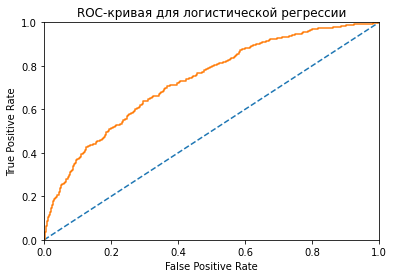

Для дерева решений F1-мера = 0.544 | Mетрика AUC-ROC = 0.806, accuracy = 0.851
Для случайного леса F1-мера = 0.567 | Mетрика AUC-ROC = 0.824, accuracy = 0.851
Для логистической регрессии F1-мера = 0.266 | Mетрика AUC-ROC = 0.732, accuracy = 0.810


In [24]:
print('Лучшие модели, обученные на df_without_nan')
(auc_roc_tree, auc_roc_forest, auc_roc_log
 , f1_score_tree, f1_score_forest, f1_score_log
 , accuracy_tree, accuracy_forest, accuracy_log) = auc_roc_fun(features_valid_df_without_nan, target_valid_df_without_nan
                                                                , best_model_tree_without_nan
                                                                , best_model_forest_without_nan
                                                                , best_model_log_without_nan)


print("Для дерева решений F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_tree, auc_roc_tree, accuracy_tree))
print("Для случайного леса F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_forest, auc_roc_forest, accuracy_forest))
print("Для логистической регрессии F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_log, auc_roc_log, accuracy_log))
print()
print('________________________________________________________________________________________')
print()
print('Лучшие модели, обученные на df_with_zero')
(auc_roc_tree, auc_roc_forest, auc_roc_log
 , f1_score_tree, f1_score_forest, f1_score_log
 , accuracy_tree, accuracy_forest, accuracy_log) = auc_roc_fun(features_valid_df_with_zero, target_valid_df_with_zero
                                                                 , best_model_tree_with_zero
                                                                 , best_model_forest_with_zero
                                                                 , best_model_log_with_zero)

print("Для дерева решений F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_tree, auc_roc_tree, accuracy_tree))
print("Для случайного леса F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_forest, auc_roc_forest, accuracy_forest))
print("Для логистической регрессии F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_log, auc_roc_log, accuracy_log))

print()
print('________________________________________________________________________________________')
print()
print('Лучшие модели, обученные на df_with_median')
(auc_roc_tree, auc_roc_forest, auc_roc_log
 , f1_score_tree, f1_score_forest, f1_score_log
 , accuracy_tree, accuracy_forest, accuracy_log) = auc_roc_fun(features_valid_df_with_median, target_valid_df_with_median
                                                                 , best_model_tree_with_median
                                                                 , best_model_forest_with_median
                                                                 , best_model_log_with_median)

print("Для дерева решений F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_tree, auc_roc_tree, accuracy_tree))
print("Для случайного леса F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_forest, auc_roc_forest, accuracy_forest))
print("Для логистической регрессии F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_log, auc_roc_log, accuracy_log))

###  Вывод:
* Изучили дисбаланс классов: Соотношение меток 1 и 0 в таргете: 3.9
* Учитывая соотношение меток 1 и 0 в таргете разбили каждый из подгоовленных датафреймов (df_without_nan, df_with_zero, df_with_median) на тривыборки в соотношении 3:1:1
* Написали функцию построеня ROC-криваой и нахождения метрики качества AUC-ROC и представления F1 меры
* Написали функцию, которая перебором, меняя параметры и гиперпараметры ищет лучшую модель по максимальной F1-мере
* С помощью функции обучили разные модели (DecisionTreeClassifier, RandomForestClassifier, LogisticRegression) без учета дисбаланса классов и выбрали лучшие из них.
1. Лучшие модели, обученные на df_without_nan:
 * Для дерева решений F1-мера = 0.551 | Mетрика AUC-ROC = 0.825, accuracy = 0.855
 * Для случайного леса F1-мера = 0.589 | Mетрика AUC-ROC = 0.840, accuracy = 0.868
 * Для логистической регрессии F1-мера = 0.337 | Mетрика AUC-ROC = 0.742, accuracy = 0.821
2. Лучшие модели, обученные на df_with_zero:
 * Для дерева решений F1-мера = 0.544 | Mетрика AUC-ROC = 0.806, accuracy = 0.851
 * Для случайного леса F1-мера = 0.559 | Mетрика AUC-ROC = 0.819, accuracy = 0.846
 * Для логистической регрессии F1-мера = 0.238 | Mетрика AUC-ROC = 0.738, accuracy = 0.805
3. Лучшие модели, обученные на df_with_median:
 * Для дерева решений F1-мера = 0.544 | Mетрика AUC-ROC = 0.806, accuracy = 0.851
 * Для случайного леса F1-мера = 0.567 | Mетрика AUC-ROC = 0.824, accuracy = 0.851
 * Для логистической регрессии F1-мера = 0.240 | Mетрика AUC-ROC = 0.734, accuracy = 0.806 

**Лучшей моделью c F1-мерой = 0.589  оказалась модель случайного леса обученая на данных с удаленными стоками NaN с параметрами:(RandomForestClassifier(bootstrap=False, min_weight_fraction_leaf=0.001,n_estimators=12, random_state=12345))**

**Значение F1-меры = 0.589 удовлетворяет заданию проекта, причем метрика AUC-ROC = 0.840, accuracy = 0.868 также является отличным результатом.**

## Борьба с дисбалансом

### Для борьбы с дисбалансом воспользуемся техниками увеличение выборки (upsampling), уменьшение выборки(downsampling) и изменением class_weight

#### Напишем функцию, который перебором, меняя параметры и гиперпараметры а также меняя колличество раз увеличения (уменьшения)  положительных объектов  и изменением class_weight ищет лучшую модель по максимальной F1-мере

In [25]:
def sample(features_train, target_train, features_valid, target_valid):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    the_best_model_tree = None
    the_best_model_forest = None
    the_best_model_log = None
    best_result_tree = 0
    best_result_forest = 0
    best_result_log = 0
    
    for method in ['up', 'down', 'balanced']:
        
        if method == 'up':
        
            for repeat in range(3,4):
                features_sampled = pd.concat([features_zeros] + [features_ones] * repeat)
                target_sampled = pd.concat([target_zeros] + [target_ones] * repeat)                
                features_sampled, target_sampled = shuffle(features_sampled, target_sampled, random_state=12345)
                
                (best_model_tree, best_model_forest, best_model_log) = search_best_parameters(features_sampled
                                                                                               , target_sampled
                                                                                               , features_valid
                                                                                               , target_valid)
                
                               
                predictions_tree = best_model_tree.predict(features_valid)
                result_tree = f1_score(target_valid, predictions_tree)
                            

                if result_tree > best_result_tree:
                    the_best_model_tree = best_model_tree


                predictions_forest = best_model_forest.predict(features_valid)
                result_forest = f1_score(target_valid, predictions_forest)

                if result_forest > best_result_forest:
                    the_best_model_forest = best_model_forest


                predictions_log = best_model_log.predict(features_valid)
                result_log = f1_score(target_valid, predictions_log)

                if result_log > best_result_log:
                    the_best_model_log = best_model_log
                
                
        elif method == 'down':
            
            for fraction in np.arange(0.4, 0.6, 0.05):
                
                features_sampled = pd.concat(
                    [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
                target_sampled = pd.concat(
                    [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

                features_sampled, target_sampled = shuffle(features_sampled, target_sampled, random_state=12345)
                (best_model_tree, best_model_forest, best_model_log) = search_best_parameters(features_sampled
                                                                                               , target_sampled
                                                                                               , features_valid
                                                                                               , target_valid)


                predictions_tree = best_model_tree.predict(features_valid)
                result_tree = f1_score(target_valid, predictions_tree)

                if result_tree > best_result_tree:
                    the_best_model_tree = best_model_tree


                predictions_forest = best_model_forest.predict(features_valid)
                result_forest = f1_score(target_valid, predictions_forest)

                if result_forest > best_result_forest:
                    the_best_model_forest = best_model_forest


                predictions_log = best_model_log.predict(features_valid)
                result_log = f1_score(target_valid, predictions_log)

                if result_log > best_result_log:
                    the_best_model_log = best_model_log
                    
                    
        elif method == 'balanced':
            
            for balanc in np.arange(0.15, 0.3, 0.05):
            
                (best_model_tree, best_model_forest, best_model_log) = search_best_parameters(features_train
                                                                                               , target_train
                                                                                               , features_valid
                                                                                               , target_valid
                                                                                               , {0: balanc, 1: 1.0})


                predictions_tree = best_model_tree.predict(features_valid)
                result_tree = f1_score(target_valid, predictions_tree)

                if result_tree > best_result_tree:
                    the_best_model_tree = best_model_tree


                predictions_forest = best_model_forest.predict(features_valid)
                result_forest = f1_score(target_valid, predictions_forest)

                if result_forest > best_result_forest:
                    the_best_model_forest = best_model_forest


                predictions_log = best_model_log.predict(features_valid)
                result_log = f1_score(target_valid, predictions_log)

                if result_log > best_result_log:
                    the_best_model_log = best_model_log 
        
        
    return (the_best_model_tree, the_best_model_forest, the_best_model_log)

#### Найдем лучшие модели с учетом дисбаланса. 

Обучать будем три модели DecisionTreeClassifier, RandomForestClassifier, LogisticRegression на трех выборках подготовненных из df_without_nan, df_with_zero, df_with_median, при этом для борьбы с дисбалансом будем использовать увеличение выборки (upsampling), уменьшение выборки(downsampling) и изменением class_weight

**В функции sample, сейчас, также максимально сокращен диапазон перебора для ускорения выполнения кода, на самом деле я делал его по шире и вкючал на ночь. Урезанный диапазон является лучшим)**

In [26]:
(best_model_tree_without_nan
 , best_model_forest_without_nan
 , best_model_log_without_nan) = sample(features_train_df_without_nan
                                        , target_train_df_without_nan
                                        , features_valid_df_without_nan
                                        , target_valid_df_without_nan)

print('Лучшие модели с учетом дисбаланса, обученные на df_without_nan')
print(best_model_tree_without_nan)
print(best_model_forest_without_nan)
print(best_model_log_without_nan)

(best_model_tree_with_zero
 , best_model_forest_with_zero
 , best_model_log_with_zero) = search_best_parameters(features_train_df_with_zero
                                                        , target_train_df_with_zero
                                                        , features_valid_df_with_zero
                                                        , target_valid_df_with_zero)

print('Лучшие модели с учетом дисбаланса, обученные на df_with_zero')
print(best_model_tree_with_zero)
print(best_model_forest_with_zero)
print(best_model_log_with_zero)


(best_model_tree_with_median
 , best_model_forest_with_median
 , best_model_log_with_median) = search_best_parameters(features_train_df_with_median
                                                      , target_train_df_with_median
                                                      , features_valid_df_with_median
                                                      , target_valid_df_with_median)

print('Лучшие модели с учетом дисбаланса, обученные на df_with_median')
print(best_model_tree_with_median)
print(best_model_forest_with_median)
print(best_model_log_with_median)

Лучшие модели с учетом дисбаланса, обученные на df_without_nan
DecisionTreeClassifier(class_weight={0: 0.25, 1: 1.0}, criterion='entropy',
                       max_depth=5, random_state=12345)
RandomForestClassifier(class_weight={0: 0.25, 1: 1.0}, criterion='entropy',
                       min_weight_fraction_leaf=0.001, n_estimators=22,
                       random_state=12345)
LogisticRegression(C=0.9, class_weight={0: 0.25, 1: 1.0}, max_iter=40,
                   random_state=12345, solver='liblinear')
Лучшие модели с учетом дисбаланса, обученные на df_with_zero
DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=12345)
RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=13,
                       random_state=12345)
LogisticRegression(C=0.8, max_iter=40, random_state=12345, solver='liblinear')
Лучшие модели с учетом дисбаланса, обученные на df_with_median
DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=12345)
Random

#### Нашли лучшие модели с учетом дисбаланса.  Построим ROC-кривую и найдем метрику качества AUC-ROC для каждой модели и для каждого датафрейма

Лучшие модели, обученные на df_without_nan


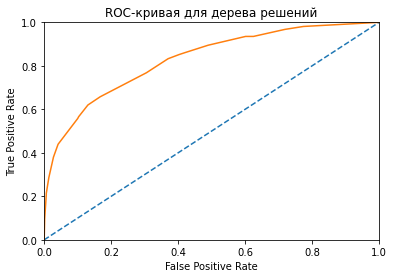

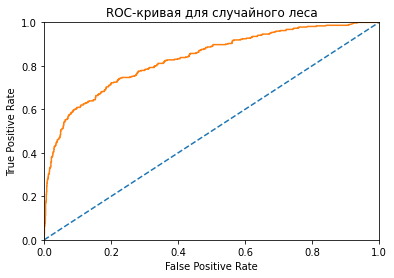

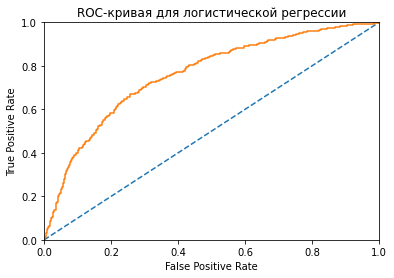

Для дерева решений F1-мера = 0.582 | Mетрика AUC-ROC = 0.829, accuracy = 0.819
Для случайного леса F1-мера = 0.614 | Mетрика AUC-ROC = 0.834, accuracy = 0.847
Для логистической регрессии F1-мера = 0.488 | Mетрика AUC-ROC = 0.760, accuracy = 0.696

________________________________________________________________________________________

Лучшие модели, обученные на df_with_zero


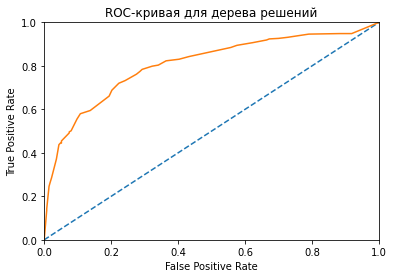

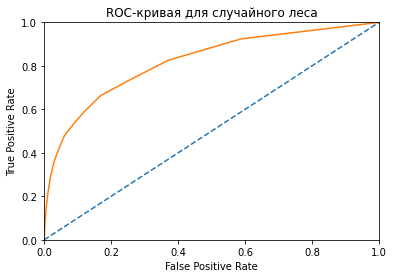

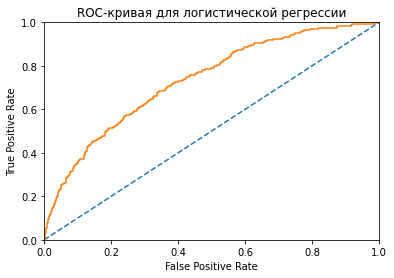

Для дерева решений F1-мера = 0.544 | Mетрика AUC-ROC = 0.806, accuracy = 0.851
Для случайного леса F1-мера = 0.559 | Mетрика AUC-ROC = 0.819, accuracy = 0.846
Для логистической регрессии F1-мера = 0.233 | Mетрика AUC-ROC = 0.734, accuracy = 0.806

________________________________________________________________________________________

Лучшие модели, обученные на df_with_median


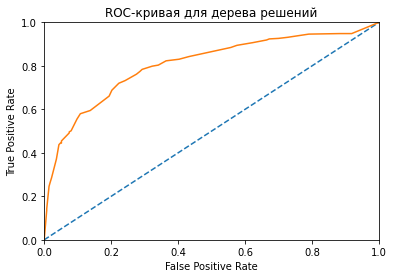

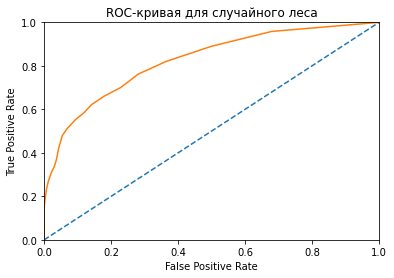

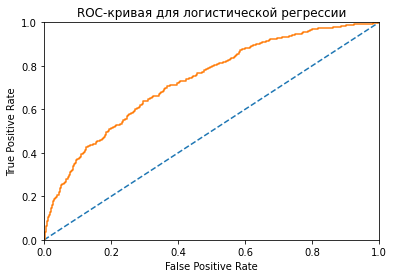

Для дерева решений F1-мера = 0.544 | Mетрика AUC-ROC = 0.806, accuracy = 0.851
Для случайного леса F1-мера = 0.567 | Mетрика AUC-ROC = 0.824, accuracy = 0.851
Для логистической регрессии F1-мера = 0.266 | Mетрика AUC-ROC = 0.732, accuracy = 0.810


In [27]:
print('Лучшие модели, обученные на df_without_nan')
(auc_roc_tree, auc_roc_forest, auc_roc_log
 , f1_score_tree, f1_score_forest, f1_score_log
 , accuracy_tree, accuracy_forest, accuracy_log) = auc_roc_fun(features_valid_df_without_nan, target_valid_df_without_nan
                                                                , best_model_tree_without_nan
                                                                , best_model_forest_without_nan
                                                                , best_model_log_without_nan)


print("Для дерева решений F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_tree, auc_roc_tree, accuracy_tree))
print("Для случайного леса F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_forest, auc_roc_forest, accuracy_forest))
print("Для логистической регрессии F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_log, auc_roc_log, accuracy_log))
print()
print('________________________________________________________________________________________')
print()
print('Лучшие модели, обученные на df_with_zero')
(auc_roc_tree, auc_roc_forest, auc_roc_log
 , f1_score_tree, f1_score_forest, f1_score_log
 , accuracy_tree, accuracy_forest, accuracy_log) = auc_roc_fun(features_valid_df_with_zero, target_valid_df_with_zero
                                                                 , best_model_tree_with_zero
                                                                 , best_model_forest_with_zero
                                                                 , best_model_log_with_zero)

print("Для дерева решений F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_tree, auc_roc_tree, accuracy_tree))
print("Для случайного леса F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_forest, auc_roc_forest, accuracy_forest))
print("Для логистической регрессии F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_log, auc_roc_log, accuracy_log))

print()
print('________________________________________________________________________________________')
print()
print('Лучшие модели, обученные на df_with_median')
(auc_roc_tree, auc_roc_forest, auc_roc_log
 , f1_score_tree, f1_score_forest, f1_score_log
 , accuracy_tree, accuracy_forest, accuracy_log) = auc_roc_fun(features_valid_df_with_median, target_valid_df_with_median
                                                                 , best_model_tree_with_median
                                                                 , best_model_forest_with_median
                                                                 , best_model_log_with_median)

print("Для дерева решений F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_tree, auc_roc_tree, accuracy_tree))
print("Для случайного леса F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_forest, auc_roc_forest, accuracy_forest))
print("Для логистической регрессии F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_log, auc_roc_log, accuracy_log))

###  Вывод:
* Для борьбы с дисбалансом воспользовались техниками: увеличение выборки (upsampling), уменьшение выборки(downsampling) и изменением class_weight
* Написали функцию, который перебором, меняя параметры и гиперпараметры а также меняя колличество раз увеличения (уменьшения) положительных объектов и изменением class_weight ищет лучшую модель по максимальной F1-мере
* С помощью функции обучили разные модели (DecisionTreeClassifier, RandomForestClassifier, LogisticRegression) без учета дисбаланса классов и выбрали лучшие из них.
1. Лучшие модели, обученные на df_without_nan:
 * Для дерева решений F1-мера = 0.582 | Mетрика AUC-ROC = 0.829, accuracy = 0.819
 * Для случайного леса F1-мера = 0.614 | Mетрика AUC-ROC = 0.834, accuracy = 0.847
 * Для логистической регрессии F1-мера = 0.488 | Mетрика AUC-ROC = 0.760, accuracy = 0.696
2. Лучшие модели, обученные на df_with_zero:
 * Для дерева решений F1-мера = 0.544 | Mетрика AUC-ROC = 0.806, accuracy = 0.851
 * Для случайного леса F1-мера = 0.559 | Mетрика AUC-ROC = 0.819, accuracy = 0.846
 * Для логистической регрессии F1-мера = 0.238 | Mетрика AUC-ROC = 0.738, accuracy = 0.805
3. Лучшие модели, обученные на df_with_median:
 * Для дерева решений F1-мера = 0.544 | Mетрика AUC-ROC = 0.806, accuracy = 0.851
 * Для случайного леса F1-мера = 0.567 | Mетрика AUC-ROC = 0.824, accuracy = 0.851
 * Для логистической регрессии F1-мера = 0.240 | Mетрика AUC-ROC = 0.734, accuracy = 0.806

**Лучшей моделью c F1-мерой = 0.614 оказалась модель случайного леса обученая на данных с удаленными стоками NaN с параметрами:(RandomForestClassifier(class_weight={0: 0.25, 1: 1.0}, criterion='entropy',min_weight_fraction_leaf=0.001, n_estimators=22,
random_state=12345))**

**Значение F1-меры = 0.61 удовлетворяет заданию проекта, причем метрика AUC-ROC = 0.834, accuracy = 0.847 также является отличным результатом.**

## Тестирование модели

Проверим нашу лучшую модель  на тестовой выборке

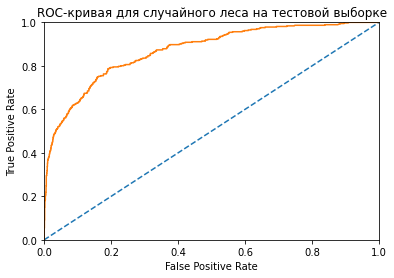

Для случайного леса на тестовой быборке F1-мера = 0.630 | Mетрика AUC-ROC = 0.824, accuracy = 0.851


In [28]:
predictions = best_model_forest_without_nan.predict(features_test_df_without_nan) 
accuracy = accuracy_score(target_test_df_without_nan, predictions)
result = f1_score(target_test_df_without_nan, predictions)
probabilities_test = best_model_forest_without_nan.predict_proba(features_test_df_without_nan)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test_df_without_nan, probabilities_one_test)
fpr, tpr, thresholds = roc_curve(target_test_df_without_nan, probabilities_one_test)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')


plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для случайного леса на тестовой выборке')
plt.show() 



print("Для случайного леса на тестовой быборке F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        result, auc_roc_forest, accuracy))

      
      
      

**Вывод:**

**Лучшей модель :(RandomForestClassifier(class_weight={0: 0.25, 1: 1.0}, criterion='entropy',min_weight_fraction_leaf=0.001, n_estimators=22, random_state=12345))**

показала отличные результаты:  F1-мера = 0.630 | Mетрика AUC-ROC = 0.824, accuracy = 0.851

Метрика F1 больше 0,59, что является фактом успешного результата по проекту

### **Общий вывод**
В ходе проекта:
* Изучили данные
* Удалили лишние столбцы, которые либо дублируют индексы, либо не являются признаками.
* Проверили на дубликаты
* Подготовили для исследования три датафрейма:
 * в первом удалили строки с NaN
 * во втором NaN заменили на ноль
 * в третьем NaN заменили на медианное значение
 
**Итого, у нас для рассмотрения три датафрейма df_without_nan, df_with_zero, df_with_median.**
**Без учета дисбаланса классов:**
 
* Изучили дисбаланс классов: Соотношение меток 1 и 0 в таргете: 3.9
* Учитывая соотношение меток 1 и 0 в таргете разбили каждый из подгоовленных датафреймов (df_without_nan, df_with_zero, df_with_median) на три выборки в соотношении 3:1:1
* Написали функцию построения ROC-кривой и нахождения метрики качества AUC-ROC и представления F1 меры
* Написали функцию, которая перебором, меняя параметры и гиперпараметры ищет лучшую модель по максимальной F1-мере
* С помощью функции обучили разные модели (DecisionTreeClassifier, RandomForestClassifier, LogisticRegression) без учета дисбаланса классов и выбрали лучшие из них.
1. Лучшие модели, обученные на df_without_nan:
 * Для дерева решений F1-мера = 0.551 | Mетрика AUC-ROC = 0.825, accuracy = 0.855
 * Для случайного леса F1-мера = 0.589 | Mетрика AUC-ROC = 0.840, accuracy = 0.868
 * Для логистической регрессии F1-мера = 0.337 | Mетрика AUC-ROC = 0.742, accuracy = 0.821
2. Лучшие модели, обученные на df_with_zero:
 * Для дерева решений F1-мера = 0.544 | Mетрика AUC-ROC = 0.806, accuracy = 0.851
 * Для случайного леса F1-мера = 0.559 | Mетрика AUC-ROC = 0.819, accuracy = 0.846
 * Для логистической регрессии F1-мера = 0.238 | Mетрика AUC-ROC = 0.738, accuracy = 0.805
3. Лучшие модели, обученные на df_with_median:
 * Для дерева решений F1-мера = 0.544 | Mетрика AUC-ROC = 0.806, accuracy = 0.851
 * Для случайного леса F1-мера = 0.567 | Mетрика AUC-ROC = 0.824, accuracy = 0.851
 * Для логистической регрессии F1-мера = 0.240 | Mетрика AUC-ROC = 0.734, accuracy = 0.806 

**Лучшей моделью c F1-мерой = 0.589  оказалась модель случайного леса обученая на данных с удаленными стоками NaN с параметрами:(RandomForestClassifier(bootstrap=False, min_weight_fraction_leaf=0.001,n_estimators=12, random_state=12345))**

**Значение F1-меры = 0.589 удовлетворяет заданию проекта, причем метрика AUC-ROC = 0.840, accuracy = 0.868 также является отличным результатом.**

**С учетом дисбаланса классов:**

* Для борьбы с дисбалансом воспользовались техниками: увеличение выборки (upsampling), уменьшение выборки(downsampling) и изменением class_weight
* Написали функцию, который перебором, меняя параметры и гиперпараметры а также меняя количество раз увеличения (уменьшения) положительных объектов и изменением class_weight ищет лучшую модель по максимальной F1-мере
* С помощью функции обучили разные модели (DecisionTreeClassifier, RandomForestClassifier, LogisticRegression) без учета дисбаланса классов и выбрали лучшие из них.
1. Лучшие модели, обученные на df_without_nan:
 * Для дерева решений F1-мера = 0.582 | Mетрика AUC-ROC = 0.829, accuracy = 0.819
 * Для случайного леса F1-мера = 0.614 | Mетрика AUC-ROC = 0.834, accuracy = 0.847
 * Для логистической регрессии F1-мера = 0.488 | Mетрика AUC-ROC = 0.760, accuracy = 0.696
2. Лучшие модели, обученные на df_with_zero:
 * Для дерева решений F1-мера = 0.544 | Mетрика AUC-ROC = 0.806, accuracy = 0.851
 * Для случайного леса F1-мера = 0.559 | Mетрика AUC-ROC = 0.819, accuracy = 0.846
 * Для логистической регрессии F1-мера = 0.238 | Mетрика AUC-ROC = 0.738, accuracy = 0.805
3. Лучшие модели, обученные на df_with_median:
 * Для дерева решений F1-мера = 0.544 | Mетрика AUC-ROC = 0.806, accuracy = 0.851
 * Для случайного леса F1-мера = 0.567 | Mетрика AUC-ROC = 0.824, accuracy = 0.851
 * Для логистической регрессии F1-мера = 0.240 | Mетрика AUC-ROC = 0.734, accuracy = 0.806

**Лучшей моделью c F1-мерой = 0.614 оказалась модель случайного леса обученая на данных с удаленными стоками NaN с параметрами:(RandomForestClassifier(class_weight={0: 0.25, 1: 1.0}, criterion='entropy',min_weight_fraction_leaf=0.001, n_estimators=22,
random_state=12345))**

**Значение F1-меры = 0.61 удовлетворяет заданию проекта, причем метрика AUC-ROC = 0.834, accuracy = 0.847 также является отличным результатом.**

**Финальное тестирование на тестовой выборке выбранной модели:**

* Лучшей модель :(RandomForestClassifier(class_weight={0: 0.25, 1: 1.0}, criterion='entropy',min_weight_fraction_leaf=0.001, n_estimators=22, random_state=12345))

показала отличные результаты: F1-мера = 0.630 | Mетрика AUC-ROC = 0.824, accuracy = 0.851

* Метрика F1 больше 0,59, что является фактом успешного результата по проекту
